# Summaries with .groupby() and .agg()

In [1]:
import pandas as pd
unemployment = pd.read_csv('datasets/clean_unemployment.csv')
unemployment.head()

,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,AGO,Angola,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,ALB,Albania,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,ARE,United Arab Emirates,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,ARG,Argentina,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90


In [2]:
# Print the mean and standard deviation of rates by year
print(unemployment.agg(['mean','std']))

          2010      2011      2012  ...      2019      2020      2021
mean  8.409286  8.315440  8.317967  ...  7.243736  8.420934  8.390879
std   6.248887  6.266795  6.367270  ...  5.696573  6.040915  6.067192

[2 rows x 12 columns]


In [3]:
# Print yearly mean and standard deviation grouped by continent
print(unemployment.groupby('continent').agg(['mean','std']))

                    2010                 2011  ...      2020       2021          
                    mean       std       mean  ...       std       mean       std
continent                                      ...                               
Africa          9.343585  7.411259   9.369245  ...  7.928166  10.473585  8.131636
Asia            6.240638  5.146175   5.942128  ...  5.699609   6.906170  5.414745
Europe         11.008205  6.392063  10.947949  ...  4.071218   7.414872  3.947825
North America   8.663333  5.115805   8.563333  ...  4.963045   9.155000  5.076482
Oceania         3.622500  2.054721   3.647500  ...  2.617490   4.280000  2.671522
South America   6.870833  2.807058   6.518333  ...  3.411263   9.924167  3.611624

[6 rows x 24 columns]


In [4]:
# Named Aggregations
continent_summary = unemployment.groupby("continent").agg(
    # Create the mean_rate_2021 column
    mean_rate_2021 = ('2021','mean'),
    # Create the std_rate_2021 column
    std_rate_2021 = ('2021','std'),
)
print(continent_summary)

               mean_rate_2021  std_rate_2021
continent                                   
Africa              10.473585       8.131636
Asia                 6.906170       5.414745
Europe               7.414872       3.947825
North America        9.155000       5.076482
Oceania              4.280000       2.671522
South America        9.924167       3.611624


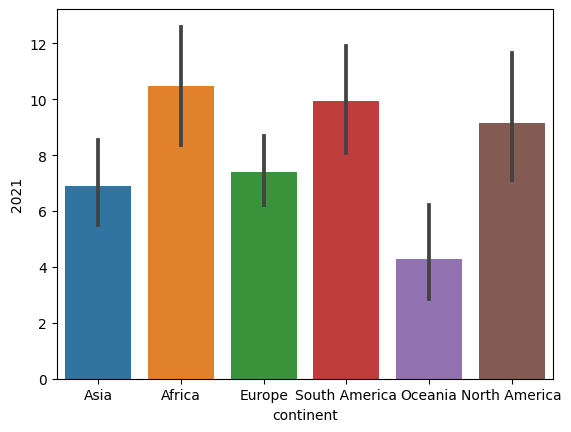

In [5]:
# Visualizing categorical summaries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot of continents and their average unemployment
sns.barplot(x='continent',y='2021',data=unemployment)
plt.show()

# Converting and analyzing categorical data

In [6]:
salaries = pd.read_csv('datasets/ds_salaries_clean.csv')
salaries.isna().sum()

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64

In [7]:
salaries.head(20)

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0
5,2020,Data Analyst,Entry,FT,US,L,100,68748.0
6,2020,Lead Data Scientist,Senior,FT,US,S,100,181418.0
7,2020,Data Scientist,Mid,FT,HU,L,50,34121.0
8,2020,Business Data Analyst,Mid,FT,US,L,100,128903.0
9,2020,Lead Data Engineer,Senior,FT,NZ,S,50,119354.0


In [8]:
# creating the list of roles
job_categories = ['Data Scientist','Data Analytics', 'Data Engineering','Machine Learning','Managerial','Consultant']

# variables for filter
data_science = 'Data Scientist|NLP'
data_analyst = 'Analyst|Analytics'
data_engineer = 'Data Engineer|ELT|Architect|Infrastructure'
ml_engineer = 'Machine Learning|ML|Big Data|AI'
manager = 'Manager|Head|Director|Lead|Principal|Staff'
consultant = 'Consultant|Freelance'

In [9]:
# conditions
conditions = [
    (salaries['Designation'].str.contains(data_science)),
    (salaries['Designation'].str.contains(data_analyst)),
    (salaries['Designation'].str.contains(data_engineer)),
    (salaries['Designation'].str.contains(ml_engineer)),
    (salaries['Designation'].str.contains(manager)),
    (salaries['Designation'].str.contains(consultant))
]

In [10]:
import numpy as np

# new column
salaries['Job_Category'] = np.select(conditions,
                                    job_categories,
                                    default='Other')

In [11]:
# preview
salaries[['Designation','Job_Category']].head()

,Designation,Job_Category
0,Data Scientist,Data Scientist
1,Machine Learning Scientist,Machine Learning
2,Big Data Engineer,Data Engineering
3,Product Data Analyst,Data Analytics
4,Machine Learning Engineer,Machine Learning


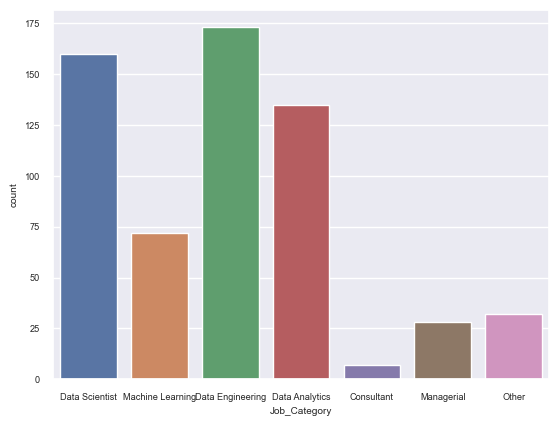

In [12]:
# visualizing
sns.set(font_scale=0.6)
sns.countplot(data=salaries,x='Job_Category')
plt.show()

# Working with numeric data
![image](image.png)


In [13]:
# add summary statistics directly into the dataframe
salaries['std_dev'] = salaries.groupby('Experience')['Salary_USD'].transform(lambda x: x.std())

salaries[['Experience','std_dev']].value_counts()

Experience  std_dev      
Senior      55086.264071     280
Mid         61014.876754     213
Entry       42390.355189      88
Executive   111783.576779     26
dtype: int64

In [14]:
# add another summary statistics into dataframe
salaries['median_by_comp_size'] = salaries.groupby('Company_Size')['Salary_USD'].transform(lambda x: x.median())

salaries[['Company_Size','median_by_comp_size']].head()

,Company_Size,median_by_comp_size
0,L,95483.0
1,S,62064.0
2,M,108076.0
3,S,62064.0
4,L,95483.0


# Handling outliers
![image-2](image-2.png)


In [15]:
# Identifying thresholds

#75th percentile
seventy_fifth = salaries['Salary_USD'].quantile(0.75)

#25th percentile
twenty_fifth = salaries['Salary_USD'].quantile(0.25)

# Interquartile range
salaries_iqr = seventy_fifth - twenty_fifth

print(salaries_iqr)

83332.0


In [16]:
# Identifying outliers

# Upper threshold
upper = seventy_fifth + (1.5 * salaries_iqr)

# Lower threshold
lower = twenty_fifth - (1.5 * salaries_iqr)

print(upper, lower)

268223.0 -65105.0


In [17]:
# Subsetting our data to get outliers
salaries[(salaries['Salary_USD']<lower) | (salaries['Salary_USD']>upper)][['Experience','Employee_Location','Salary_USD']]

,Experience,Employee_Location,Salary_USD
25,Executive,US,310321.0
33,Mid,US,429675.0
63,Senior,US,393392.0
97,Mid,US,429675.0
157,Mid,US,403895.0
225,Executive,US,397211.0
252,Executive,US,572900.0
482,Executive,US,309366.0
519,Senior,US,362837.0
523,Senior,US,386708.0


In [18]:
# Dropping outliers
no_outliers = salaries[(salaries['Salary_USD']>lower) & (salaries['Salary_USD']<upper)]

print(no_outliers['Salary_USD'].describe())

count       597.000000
mean     102328.480737
std       55910.790653
min        2730.000000
25%       59819.000000
50%       95483.000000
75%      141565.000000
max      263534.000000
Name: Salary_USD, dtype: float64


<AxesSubplot: xlabel='Salary_USD', ylabel='Count'>

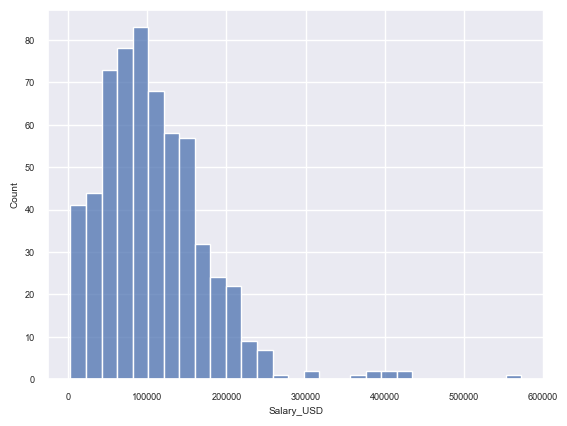

In [19]:
# Distribution of salaries in original data
sns.histplot(data=salaries, x='Salary_USD')

The original data is right-skewed by the upper outliers.

<AxesSubplot: xlabel='Salary_USD', ylabel='Count'>

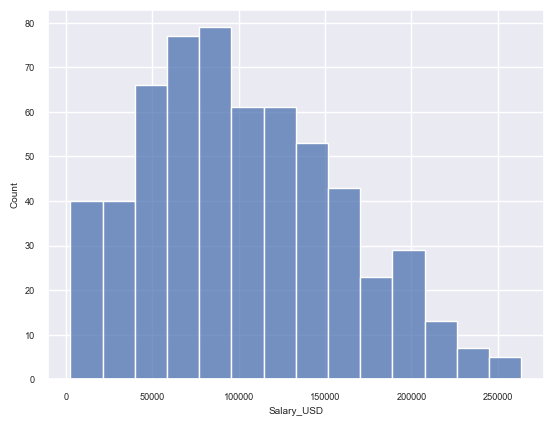

In [20]:
# Distribution of salaries in no_outliers data
sns.histplot(data=no_outliers, x='Salary_USD')

Salaries is now less skewed and looks more like a normal distribution.

# Patterns over time

In [21]:
divorce = pd.read_csv('datasets/divorce.csv')
divorce.dtypes

divorce_date          object
dob_man               object
education_man         object
income_man           float64
dob_woman             object
education_woman       object
income_woman         float64
marriage_date         object
marriage_duration    float64
num_kids             float64
dtype: object

In [22]:
# converting to DateTime data
divorce['marriage_date'] = pd.to_datetime(divorce['marriage_date'])
divorce.dtypes

divorce_date                 object
dob_man                      object
education_man                object
income_man                  float64
dob_woman                    object
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

In [23]:
# importing DateTime data
divorce = pd.read_csv('datasets/divorce.csv',parse_dates=['marriage_date'])
divorce.dtypes

divorce_date                 object
dob_man                      object
education_man                object
income_man                  float64
dob_woman                    object
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

In [24]:
# extract parts of full date
divorce['marriage_month'] = divorce['marriage_date'].dt.month
divorce['marriage_year'] = divorce['marriage_date'].dt.year
divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids,marriage_month,marriage_year
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0,6,2000
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN,9,2001
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0,2,2000
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN,5,2006
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN,8,2007


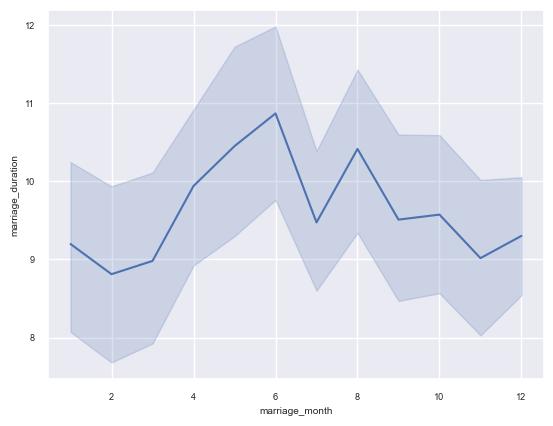

In [25]:
# Visualizing patterns over time
sns.lineplot(data=divorce,
            x='marriage_month',
            y='marriage_duration')
plt.show()

# Correlation

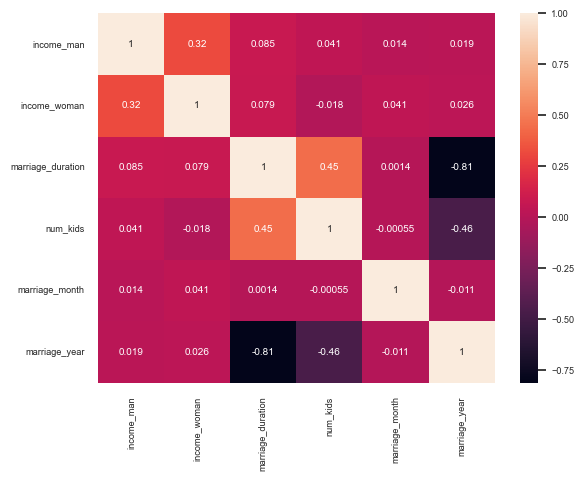

In [26]:
# Correlation heatmaps
sns.heatmap(divorce.corr(),annot=True)
plt.show()

Here, we can see that marriage year and marriage duration are strongly negatively correlated.

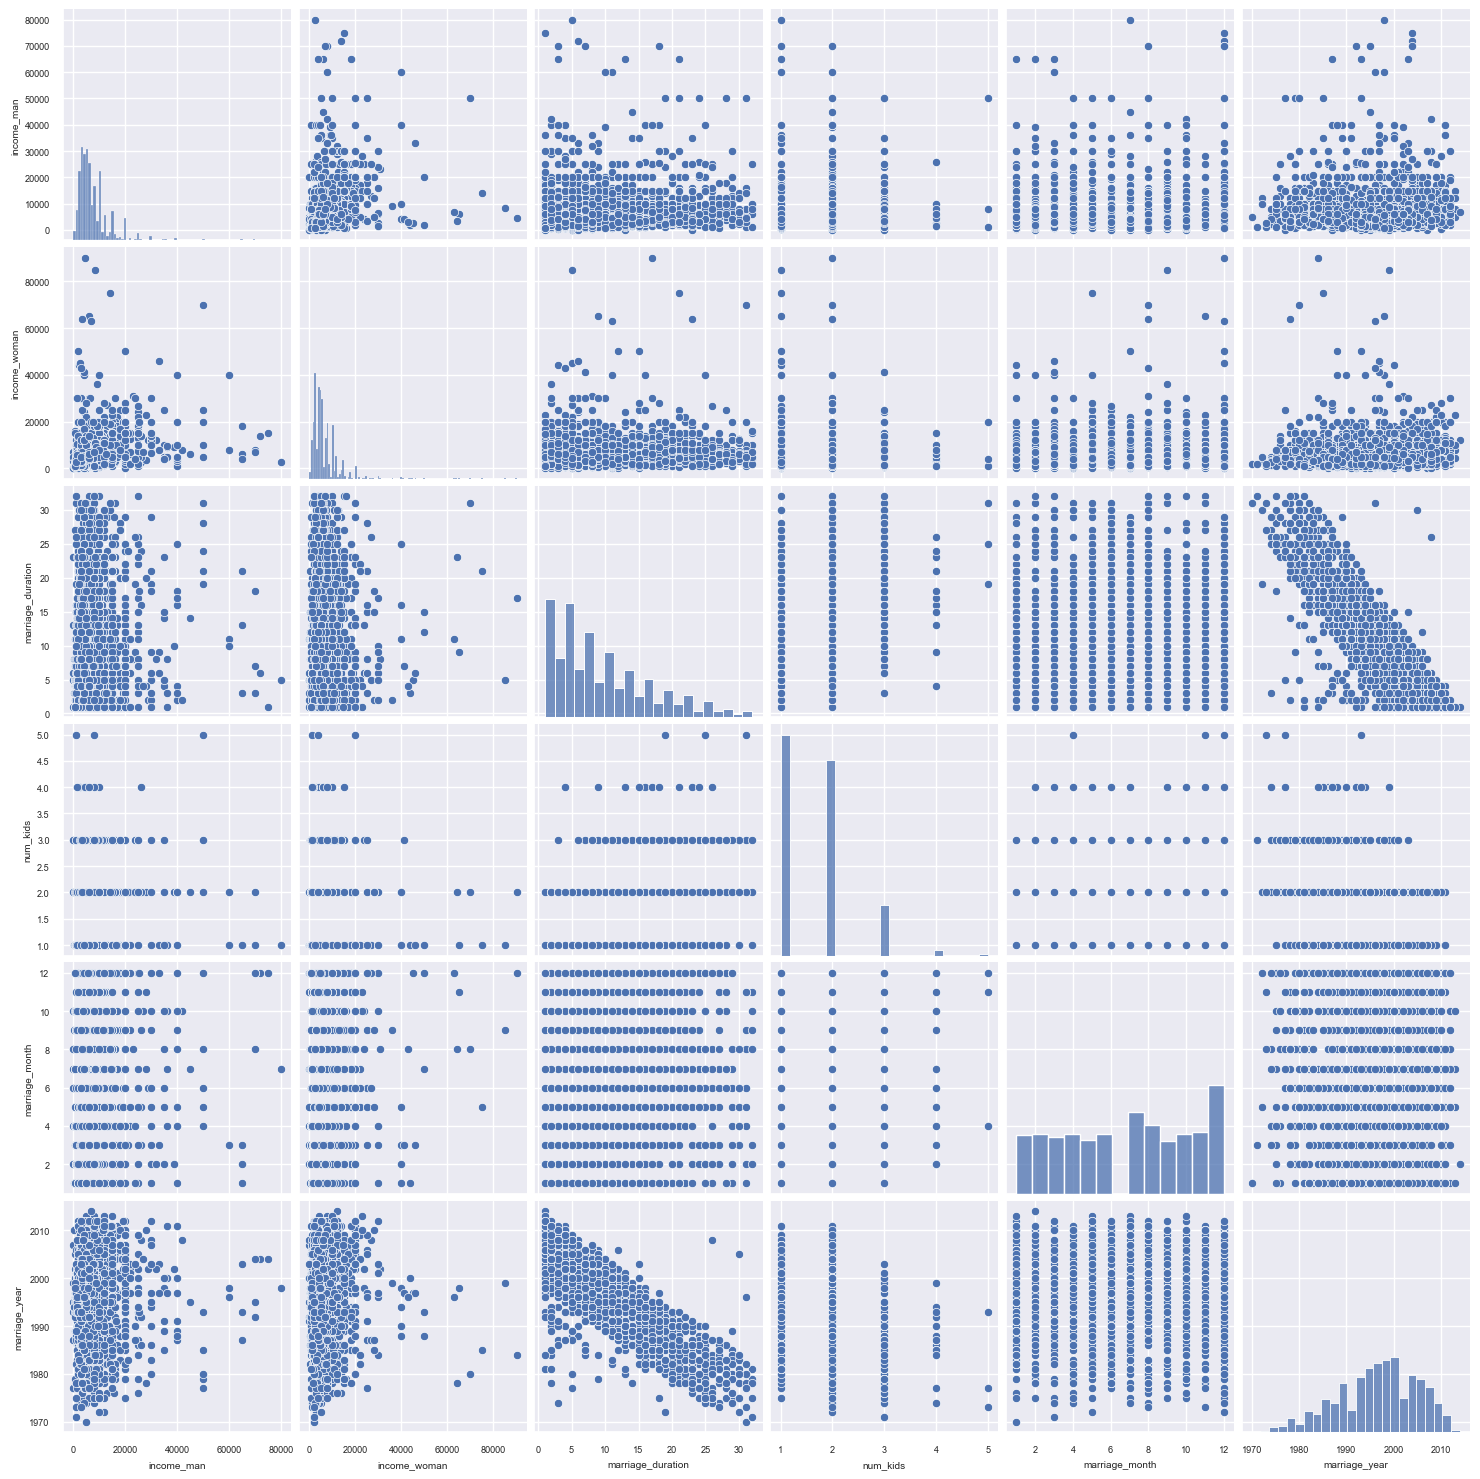

In [27]:
# Visualizing correlation using "Pairplots" which shows pairwise relationships between numerical variables in one viasualization 
sns.pairplot(data=divorce)
plt.show()

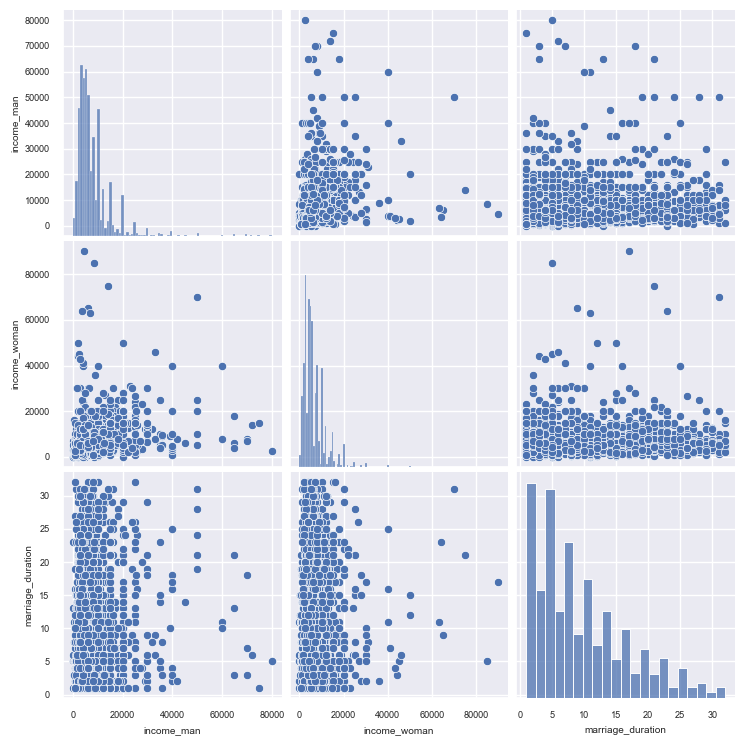

In [28]:
# limiting the pairwise plot using 'vars'
sns.pairplot(data=divorce, vars=['income_man','income_woman','marriage_duration'])
plt.show()

# Factor relationships and distributions

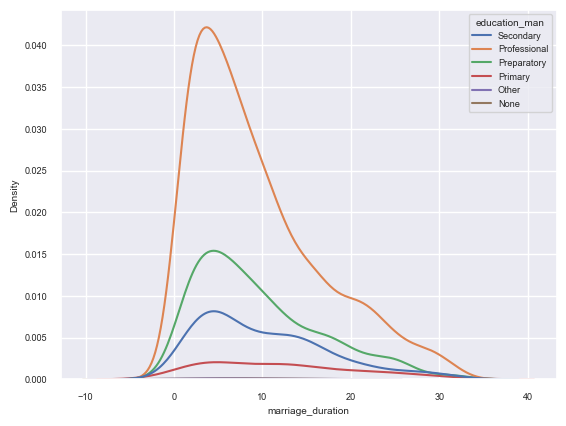

In [29]:
# KDE(Kernel Density Estimate) as it is considered more interpretable, though, especially when multiple distributions are shown

sns.kdeplot(data=divorce, x='marriage_duration',hue='education_man')
plt.show()

Due to the smoothing algrithm used in KDE plots, the curve can include values that don't make sense. For eg. In the plot the distribution seems to suggest that some couples had marriage durations of less than zero.

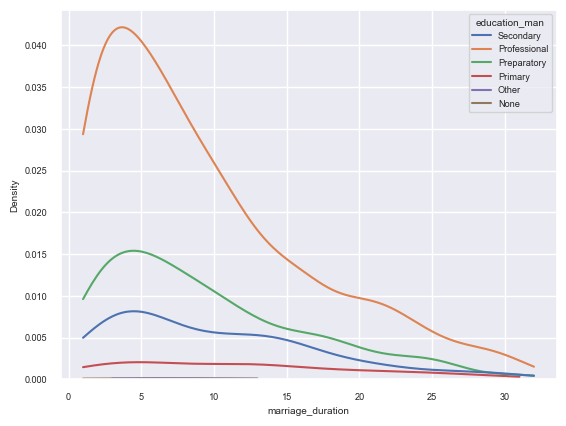

In [30]:
sns.kdeplot(data=divorce,x='marriage_duration',hue='education_man',cut=0)
plt.show()

The curve is limited to min. and max. values.

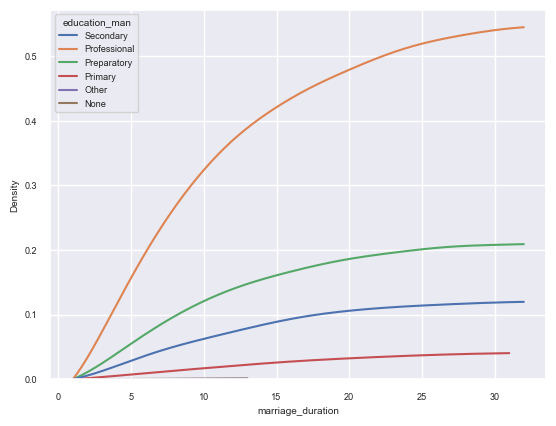

In [31]:
# Cumulative KDE plots
sns.kdeplot(data=divorce,x='marriage_duration',hue='education_man',
            cut=0,cumulative=True)
plt.show()

This graph describes the probability that marraiage duration is less than or equal to the value on the x-axis for each level of male partner education.

### Relationship between marriage age and education
Is there a relationship between age at marriage and education level?

In [32]:
divorce.dtypes

divorce_date                 object
dob_man                      object
education_man                object
income_man                  float64
dob_woman                    object
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
marriage_month                int64
marriage_year                 int64
dtype: object

In [33]:
divorce[['divorce_date','dob_man','dob_woman']] = divorce[['divorce_date','dob_man','dob_woman']].apply(pd.to_datetime)
divorce.dtypes

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
marriage_month                int64
marriage_year                 int64
dtype: object

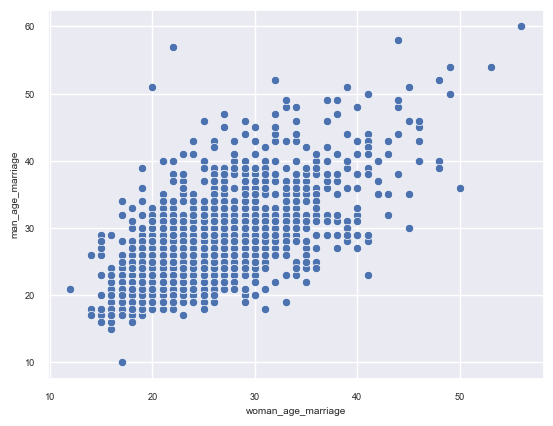

In [34]:
# approximate age to men and women 
divorce['man_age_marriage'] = divorce['marriage_year'] - divorce['dob_man'].dt.year
divorce['woman_age_marriage'] = divorce['marriage_year'] - divorce['dob_woman'].dt.year

# scatter plot
sns.scatterplot(data=divorce, x='woman_age_marriage',y='man_age_marriage')
plt.show()

It looks like there is a positive correlation between them!

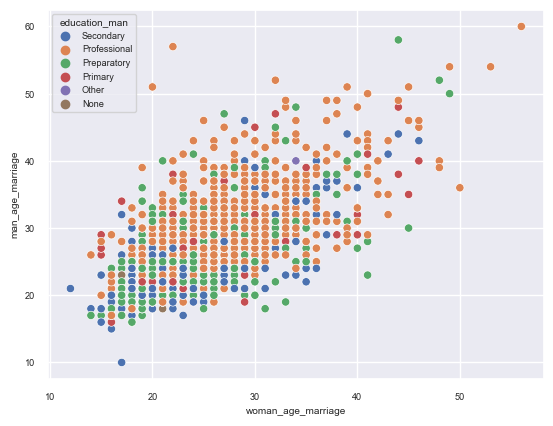

In [35]:
# Comparing relationship with education level
sns.scatterplot(data=divorce,
               x='woman_age_marriage',
               y='man_age_marriage',
               hue='education_man')
plt.show()

The results suggest that men with a proffessional education level, represented with orange dots, may tend to get married later.

# Cross tabulation
![image-3](image-3.png)


In [36]:
# Cross-tabulate Company_Size and Experience
print(pd.crosstab(salaries["Company_Size"], salaries["Experience"]))

Experience    Entry  Executive  Mid  Senior
Company_Size                               
L                29         11   86      72
M                30         12   98     186
S                29          3   29      22


In [37]:
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"]))

Company_Size       L    M   S
Job_Category                 
Consultant         3    1   3
Data Analytics    32   91  12
Data Engineering  54  105  14
Data Scientist    56   81  23
Machine Learning  25   25  22
Managerial        14   11   3
Other             14   12   6


In [38]:
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"],
            values=salaries["Salary_USD"], aggfunc="mean"))

Company_Size                  L              M             S
Job_Category                                                
Consultant         77553.000000    5449.000000  75296.333333
Data Analytics    102997.125000   98125.835165  43074.500000
Data Engineering  113829.888889  117891.714286  85645.285714
Data Scientist    107865.303571  121664.888889  70426.869565
Machine Learning  123878.520000  100849.480000  85124.954545
Managerial        170102.857143  160419.454545  98976.333333
Other              96392.928571   77968.333333  70195.166667


# Generating new features
![image-4](image-4.png)


In [39]:
salaries.dtypes

Working_Year              int64
Designation              object
Experience               object
Employment_Status        object
Employee_Location        object
Company_Size             object
Remote_Working_Ratio      int64
Salary_USD              float64
Job_Category             object
std_dev                 float64
median_by_comp_size     float64
dtype: object

In [40]:
# Find the 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)

# Save the median
salaries_median = salaries["Salary_USD"].median()

# Gather the 75th percentile
seventy_fifth = salaries['Salary_USD'].quantile(0.75)
print(twenty_fifth, salaries_median, seventy_fifth)

59893.0 96982.0 143225.0


In [41]:
# Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]

# Create salary_level
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                  bins=salary_ranges,
                                  labels=salary_labels)

salaries

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD,Job_Category,std_dev,median_by_comp_size,salary_level
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0,Data Scientist,61014.876754,95483.0,mid
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0,Machine Learning,55086.264071,62064.0,exec
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0,Data Engineering,55086.264071,108076.0,senior
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0,Data Analytics,61014.876754,62064.0,entry
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0,Machine Learning,55086.264071,95483.0,senior
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Data Engineer,Senior,FT,US,M,100,147044.0,Data Engineering,55086.264071,108076.0,exec
603,2022,Data Engineer,Senior,FT,US,M,100,120309.0,Data Engineering,55086.264071,108076.0,senior
604,2022,Data Analyst,Senior,FT,US,M,0,123174.0,Data Analytics,55086.264071,108076.0,senior
605,2022,Data Analyst,Senior,FT,US,M,100,143225.0,Data Analytics,55086.264071,108076.0,senior


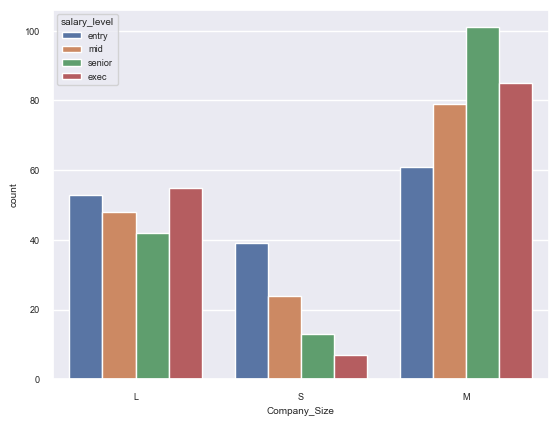

In [42]:
# Plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, hue="salary_level", x="Company_Size")
plt.show()

By using `pd.cut()` to split out numeric data into categories, you can see that a large proportion of workers at small companies get paid "entry" level salaries, while more staff at medium-sized companies are rewarded with "senior" level salary.

# Generating hypothesis

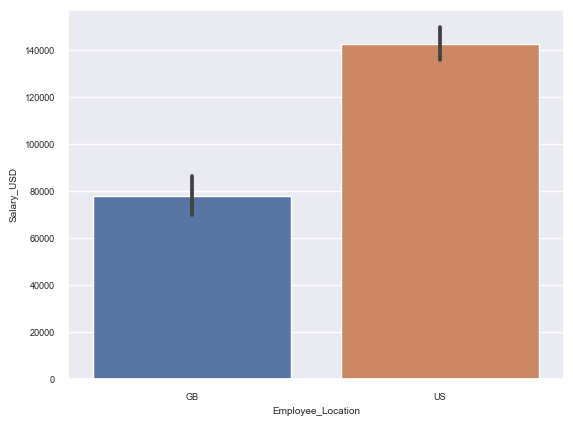

In [43]:
# Filter for employees in the US or GB
usa_and_gb = salaries[salaries["Employee_Location"].isin(["US", "GB"])]

# Create a barplot of salaries by location
sns.barplot(data=usa_and_gb, x="Employee_Location", y="Salary_USD")
plt.show()